In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Mine import *
from main import *

In [2]:
with open('param.json', 'r') as f:
    param = json.load(f)

# Run the experiment
results = std(param, for_internal_use=True)
with open('stats.json', 'w') as f:
    json.dump(results, f)

Truck0      is traveling towards Shovel2	at 0.00.
Truck1      is traveling towards Shovel2	at 0.00.
Truck2      is traveling towards Shovel2	at 0.00.
Truck3      is traveling towards Shovel2	at 0.00.
Truck4      is traveling towards Shovel2	at 0.00.
Truck5      is traveling towards Shovel2	at 0.00.
Truck6      is traveling towards Shovel2	at 0.00.
Truck7      is traveling towards Shovel2	at 0.00.
Truck8      is traveling towards Shovel2	at 0.00.
Truck9      is traveling towards Shovel2	at 0.00.
Truck5      arrived at Shovel2			at 16.96.
Truck5      start loading at Shovel2		at 16.96.
Truck4      arrived at Shovel2			at 18.03.
Truck2      arrived at Shovel2			at 18.56.
Truck3      arrived at Shovel2			at 18.91.
Truck8      arrived at Shovel2			at 18.97.
Truck7      arrived at Shovel2			at 19.56.
Truck9      arrived at Shovel2			at 19.98.
Truck6      arrived at Shovel2			at 20.15.
Truck1      arrived at Shovel2			at 20.73.
Truck0      arrived at Shovel2			at 21.87.
Truck5      loaded by 

Truck4      under unloading at DumpSite1	at 1315.56.
Truck4      unloaded at DumpSite1		at 1319.71.
Truck4      is traveling towards Shovel2	at 1319.71.
Truck3      loaded by Shovel0			at 1322.26.
Truck3      is traveling towards DumpSite0	at 1322.26.
Truck0      arrived at DumpSite0		at 1324.52.
Truck0      under unloading at DumpSite0	at 1324.52.
Truck2      arrived at DumpSite1		at 1325.27.
Truck2      under unloading at DumpSite1	at 1325.27.
Truck0      unloaded at DumpSite0		at 1327.43.
Truck0      is traveling towards Shovel0	at 1327.43.
Truck8      arrived at DumpSite0		at 1328.94.
Truck8      under unloading at DumpSite0	at 1328.94.
Truck2      unloaded at DumpSite1		at 1329.33.
Truck2      is traveling towards Shovel2	at 1329.33.
Truck8      unloaded at DumpSite0		at 1333.04.
Truck8      is traveling towards Shovel1	at 1333.04.
Truck6      arrived at Shovel2			at 1337.20.
Truck6      start loading at Shovel2		at 1337.20.
Truck9      arrived at DumpSite0		at 1339.39.
Truck9    

Truck1      loaded by Shovel1			at 4634.29.
Truck1      is traveling towards DumpSite0	at 4634.29.
Truck9      arrived at DumpSite0		at 4635.83.
Truck9      under unloading at DumpSite0	at 4635.83.
Truck4      loaded by Shovel2			at 4636.27.
Truck4      is traveling towards DumpSite1	at 4636.27.
Shovel2     failed				at 4636.27.
Shovel2     is traveling towards Workshop0	at 4636.27.
Truck9      unloaded at DumpSite0		at 4638.89.
Truck9      is traveling towards Shovel0	at 4638.89.
Shovel2     arrived at Workshop0		at 4639.54.
Truck1      arrived at DumpSite0		at 4661.81.
Truck1      under unloading at DumpSite0	at 4661.81.
Truck1      unloaded at DumpSite0		at 4665.43.
Truck1      is traveling towards Shovel0	at 4665.43.
Truck4      arrived at DumpSite1		at 4666.57.
Truck4      under unloading at DumpSite1	at 4666.57.
Truck4      unloaded at DumpSite1		at 4670.56.
Truck4      is traveling towards Shovel0	at 4670.56.
Truck9      arrived at Shovel0			at 4672.56.
Truck9      start loading

Truck7      arrived at Shovel2			at 26241.31.
Truck7      start loading at Shovel2		at 26241.31.
Truck5      arrived at Shovel0			at 26249.47.
Truck5      start loading at Shovel0		at 26249.47.
Truck7      loaded by Shovel2			at 26251.27.
Truck7      is traveling towards DumpSite1	at 26251.27.
Truck5      loaded by Shovel0			at 26256.31.
Truck5      is traveling towards DumpSite0	at 26256.31.
Shovel0     failed				at 26256.31.
Shovel0     is traveling towards Workshop0	at 26256.31.
Shovel0     arrived at Workshop0		at 26266.73.
Truck7      arrived at DumpSite1		at 26280.19.
Truck7      under unloading at DumpSite1	at 26280.19.
Truck5      arrived at DumpSite0		at 26282.30.
Truck5      under unloading at DumpSite0	at 26282.30.
Truck7      unloaded at DumpSite1		at 26283.22.
Truck7      is traveling towards Shovel2	at 26283.22.
Truck5      unloaded at DumpSite0		at 26286.68.
Truck5      is traveling towards Shovel1	at 26286.68.
Truck4      repaired by Workshop0		at 26290.53.
Truck4      

Truck0      loaded by Shovel0			at 67222.98.
Truck0      is traveling towards DumpSite0	at 67222.98.
Truck2      arrived at DumpSite0		at 67240.44.
Truck2      under unloading at DumpSite0	at 67240.44.
Truck2      unloaded at DumpSite0		at 67243.45.
Truck2      is traveling towards Shovel0	at 67243.45.
Truck0      arrived at DumpSite0		at 67246.32.
Truck0      under unloading at DumpSite0	at 67246.32.
Truck0      unloaded at DumpSite0		at 67249.39.
Truck0      is traveling towards Shovel2	at 67249.39.
Truck2      arrived at Shovel0			at 67275.85.
Truck2      start loading at Shovel0		at 67275.85.
Truck0      arrived at Shovel2			at 67285.14.
Truck0      start loading at Shovel2		at 67285.14.
Truck2      loaded by Shovel0			at 67288.61.
Truck2      is traveling towards DumpSite0	at 67288.61.
Truck0      loaded by Shovel2			at 67292.22.
Truck0      is traveling towards DumpSite1	at 67292.22.
Truck2      arrived at DumpSite0		at 67315.59.
Truck2      under unloading at DumpSite0	at 67315.

Shovel1     repaired at Workshop0		at 76509.13.
Shovel1     is traveling towards its site	at 76509.13.
Shovel2     is under repair at Workshop0	at 76509.13.
Shovel1     arrived at its site			at 76540.61.
Shovel2     repaired at Workshop0		at 77102.77.
Shovel2     is traveling towards its site	at 77102.77.
Shovel0     is under repair at Workshop0	at 77102.77.
Shovel2     arrived at its site			at 77106.53.
Shovel0     repaired at Workshop0		at 77643.37.
Shovel0     is traveling towards its site	at 77643.37.
Truck1      under repair at Workshop0		at 77643.37.
Shovel0     arrived at its site			at 77655.35.
Truck1      repaired by Workshop0		at 77833.15.
Truck1      is traveling towards Shovel2	at 77833.15.
Truck3      under repair at Workshop0		at 77833.15.
Truck1      arrived at Shovel2			at 77836.35.
Truck1      start loading at Shovel2		at 77836.35.
Truck1      loaded by Shovel2			at 77846.82.
Truck1      is traveling towards DumpSite1	at 77846.82.
Truck1      arrived at DumpSite1		at 7

Shovel1     repaired at Workshop0		at 82852.36.
Shovel1     is traveling towards its site	at 82852.36.
Shovel2     is under repair at Workshop0	at 82852.36.
Truck4      is traveling to Workshop0		at 82882.51.
Shovel1     arrived at its site			at 82882.97.
Truck8      start loading at Shovel1		at 82882.97.
Truck4      arrived at WorkShop0		at 82886.47.
Truck8      loaded by Shovel1			at 82892.51.
Truck8      is traveling towards DumpSite0	at 82892.51.
Truck1      start loading at Shovel1		at 82892.51.
Truck1      loaded by Shovel1			at 82902.19.
Truck1      is traveling towards DumpSite0	at 82902.19.
Truck8      arrived at DumpSite0		at 82926.22.
Truck8      under unloading at DumpSite0	at 82926.22.
Truck1      arrived at DumpSite0		at 82928.46.
Truck8      unloaded at DumpSite0		at 82929.93.
Truck8      is traveling towards Shovel1	at 82929.93.
Truck1      under unloading at DumpSite0	at 82929.93.
Truck1      unloaded at DumpSite0		at 82932.81.
Truck1      is traveling to Workshop1		at

Shovel0     arrived at Workshop0		at 85413.93.
Truck1      arrived at DumpSite0		at 85431.65.
Truck1      under unloading at DumpSite0	at 85431.65.
Truck1      unloaded at DumpSite0		at 85434.28.
Truck1      is traveling towards Shovel1	at 85434.28.
Truck1      arrived at Shovel1			at 85469.12.
Truck0      repaired by Workshop1		at 85520.68.
Truck0      is traveling towards Shovel2	at 85520.68.
Truck2      under repair at Workshop1		at 85520.68.
Truck0      arrived at Shovel2			at 85542.03.
Truck2      repaired by Workshop1		at 85855.09.
Truck2      is traveling towards Shovel2	at 85855.09.
Truck8      under repair at Workshop1		at 85855.09.
Truck2      arrived at Shovel2			at 85873.58.
Truck8      repaired by Workshop1		at 86153.76.
Truck8      is traveling towards Shovel2	at 86153.76.
Truck8      arrived at Shovel2			at 86175.24.
Truck3      is traveling to Workshop0		at 86792.64.
Truck3      arrived at WorkShop0		at 86795.82.
Truck8      is traveling to Workshop0		at 87029.77.
Truck

Shovel2     is traveling towards Workshop0	at 98182.56.
Shovel2     arrived at Workshop0		at 98186.04.
Truck8      arrived at DumpSite0		at 98208.83.
Truck8      under unloading at DumpSite0	at 98208.83.
Truck8      unloaded at DumpSite0		at 98211.92.
Truck8      is traveling towards Shovel1	at 98211.92.
Truck7      arrived at DumpSite1		at 98215.33.
Truck7      under unloading at DumpSite1	at 98215.33.
Truck7      unloaded at DumpSite1		at 98218.24.
Truck7      is traveling towards Shovel1	at 98218.24.
Truck8      arrived at Shovel1			at 98240.63.
Truck8      start loading at Shovel1		at 98240.63.
Truck8      loaded by Shovel1			at 98248.44.
Truck8      is traveling towards DumpSite0	at 98248.44.
Truck8      arrived at DumpSite0		at 98280.40.
Truck8      under unloading at DumpSite0	at 98280.40.
Truck8      unloaded at DumpSite0		at 98283.99.
Truck8      is traveling towards Shovel1	at 98283.99.
Truck7      arrived at Shovel1			at 98293.58.
Truck7      start loading at Shovel1		at 982

In [3]:
with open('stats.json', 'r') as f:
    stats = json.load(f)

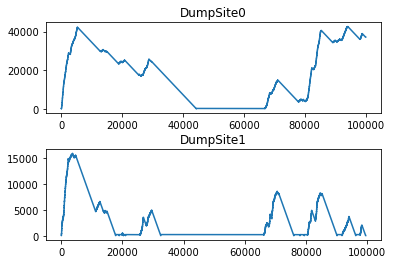

In [4]:
for i in range(2):
    data = np.array(stats["DumpSite%d_stockpileLevel" % i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d" % i)
plt.subplots_adjust(hspace=.4)
plt.show()

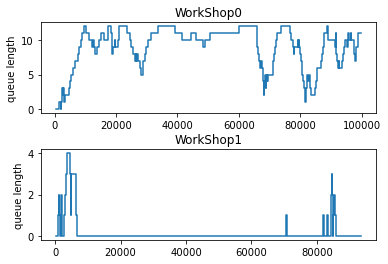

In [5]:
for i in range(2):
    data = np.array(stats["WorkShop%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("WorkShop%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

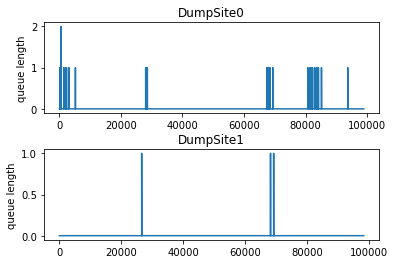

In [6]:
for i in range(2):
    data = np.array(stats["DumpSite%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

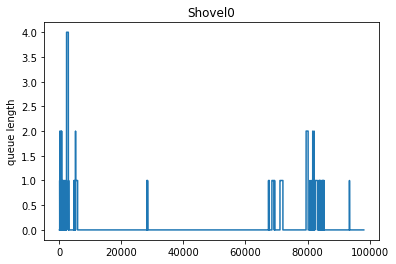

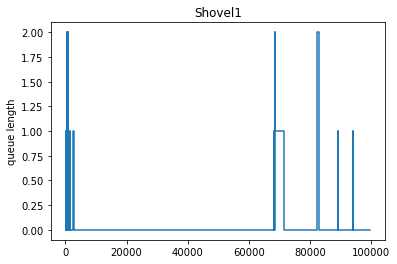

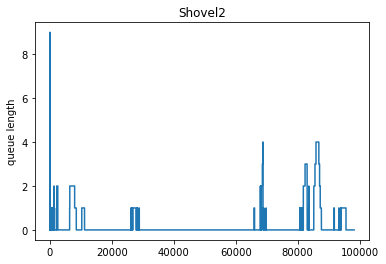

In [9]:
for i in range(3):
    data = np.array(stats["Shovel%d_queue"%i])
    plt.step(data[:,0], data[:,1])
    plt.title("Shovel%d"%i)
    plt.ylabel("queue length")
    plt.show()